In [83]:
import pandas
import scipy
import sklearn
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GroupKFold


keras.__version__

'3.0.5'

In [84]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [85]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

#dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

#dataset = pandas.read_csv(folder_path + 'activity-timed-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance'])

dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance'])

# split into input (X) and output (Y) variables
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance']].values
#X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
y = dataset['ssq_score'].values


In [86]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [87]:
l1size = 3

In [88]:
print(len(X), len(y))


1041 1041


In [89]:
all_train_predictions = []
all_test_predictions = []

In [90]:


for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential()
    model.add(Dense(l1size, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='relu'))

    optm = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
    model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_test, y_test))

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    all_train_predictions.append(predict_train)
    all_test_predictions.append(predict_test)

Epoch 1/400


c:\Users\aoife\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (1, 27)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 27), dtype=float32)
  • training=True
  • mask=None

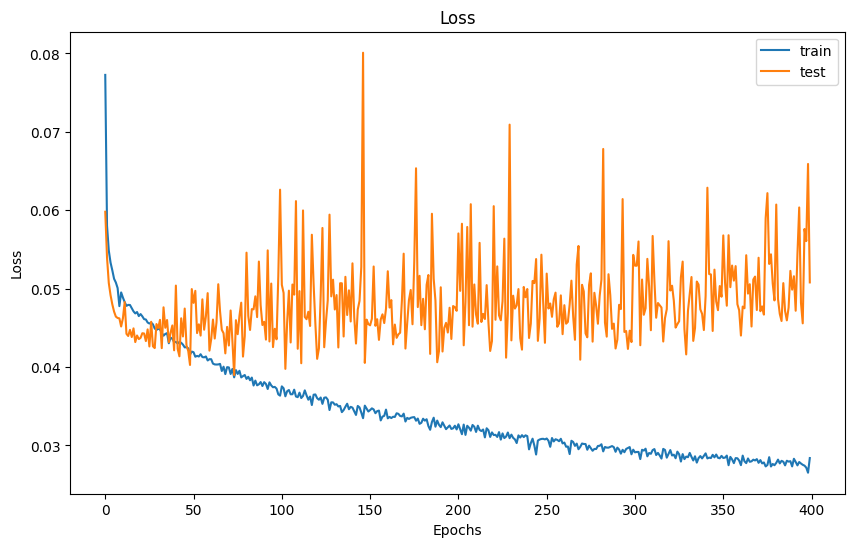

In [ ]:
# plot loss during training
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



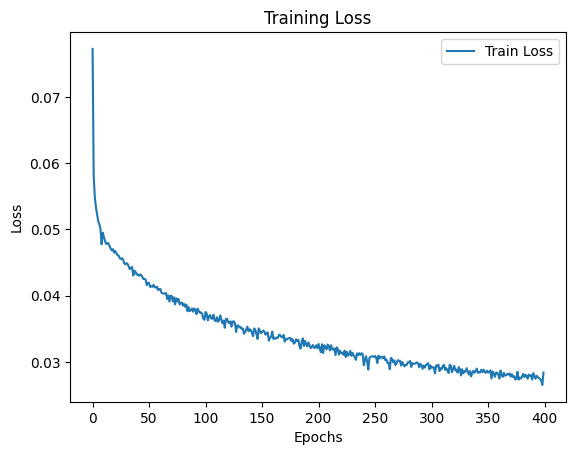

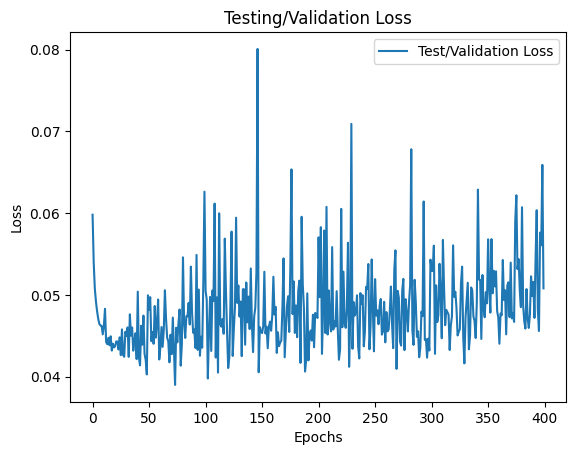

In [ ]:

# training loss
plt.figure()
plt.title('Training Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# testing loss
plt.figure()
plt.title('Testing/Validation Loss')
plt.plot(history.history['val_loss'], label='Test/Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


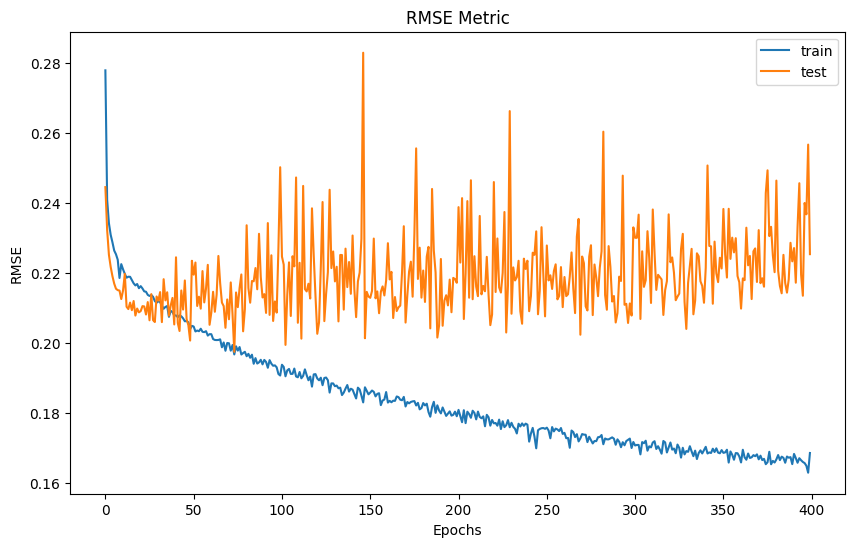

In [ ]:
# plots for rmse

plt.figure(figsize=(10,6))
plt.title('RMSE Metric')
plt.plot(history.history['root_mean_squared_error'], label='train')
plt.plot(history.history['val_root_mean_squared_error'], label='test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()



In [ ]:
# plot loss during training

import matplotlib as plt


In [ ]:
# print average RMSE as calculated by the loss function

print("Average Training MSE: ", history.history['loss'][-1])

print("Average Testing MSE: ", history.history['val_loss'][-1])



Average Training MSE:  0.028385156765580177
Average Testing MSE:  0.050791896879673004


In [ ]:
print("Average Training RMSE: ", history.history['root_mean_squared_error'][-1])
print("Average Testing RMSE: ", history.history['val_root_mean_squared_error'][-1])

Average Training RMSE:  0.16847895085811615
Average Testing RMSE:  0.22537057101726532
